In [ ]:
import pandas as pd

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 11.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
import easyocr

def recognize_mandarin_text(image_path):
    reader = easyocr.Reader(['ch_sim'])
    result = reader.readtext(image_path)
    recognized_text = ' '.join([text[1] for text in result])
    return recognized_text

image_path = '/content/drive/MyDrive/12th Grade/Machine Learning/Data/Chinese/test.png'
text = recognize_mandarin_text(image_path)
print("\nRecognized Mandarin Text:")
print(text)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Recognized Mandarin Text:
我喜欢机器学习


In [ ]:
!pip install translate

In [ ]:
from translate import Translator

def translate_text(text, source_lang='zh-cn', target_lang='en'):
    translator = Translator(from_lang=source_lang, to_lang=target_lang)
    translated_text = translator.translate(text)
    return translated_text

translated_text = translate_text(text, source_lang='zh-cn', target_lang='en')
print('Original Text:')
print(text)
print('Translated Text:')
print(translated_text)

Original Text:
我喜欢机器学习
Translated Text:
I like machine learning


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Chinese/Data.csv')

In [ ]:
df.head()

,Character,Image
0,中,https://storage.googleapis.com/kagglesdsdata/d...
1,月,https://storage.googleapis.com/kagglesdsdata/d...
2,我,https://storage.googleapis.com/kagglesdsdata/d...
3,上,https://storage.googleapis.com/kagglesdsdata/d...
4,他,https://storage.googleapis.com/kagglesdsdata/d...


In [ ]:
df.shape

(18, 2)

In [ ]:
from PIL import Image
import requests
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


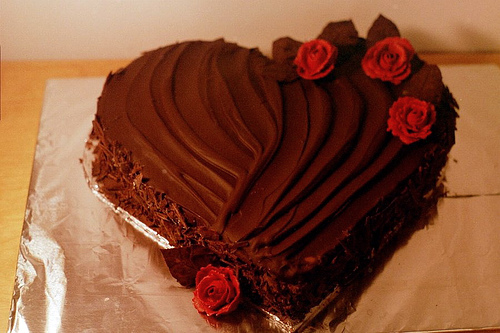

In [ ]:
roses = list(data_dir.glob('roses/*'))
Image.open(str(roses[1]))

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180,180),
    batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(180,180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
92/92 [==============================] - 139s 2s/step - loss: 0.9425 - accuracy: 0.6298 - val_loss: 0.9158 - val_accuracy: 0.6335
Epoch 2/3
92/92 [==============================] - 123s 1s/step - loss: 0.7709 - accuracy: 0.6975 - val_loss: 0.8776 - val_accuracy: 0.6608
Epoch 3/3
92/92 [==============================] - 111s 1s/step - loss: 0.5961 - accuracy: 0.7704 - val_loss: 0.9130 - val_accuracy: 0.6362


In [ ]:
import matplotlib.pyplot as plt

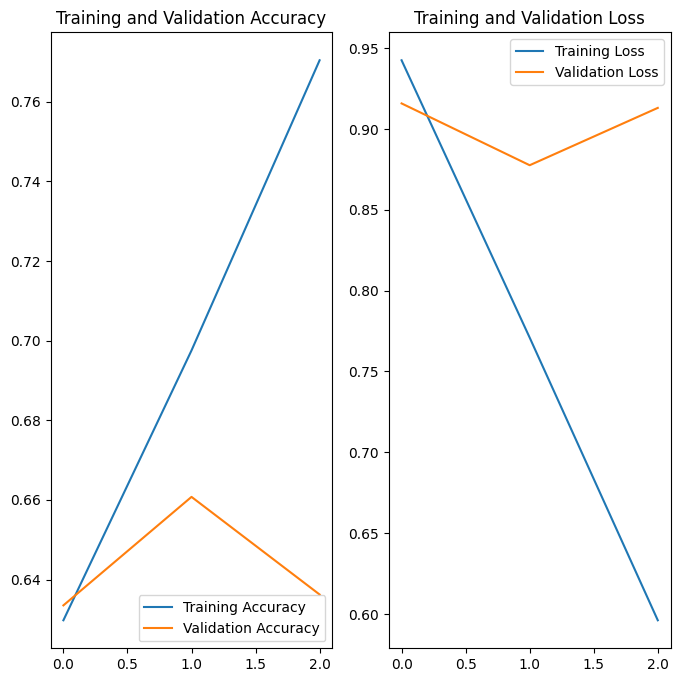

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

I tried doing it with my own dataset of Chinese characters but there was an issue with tensorflow accessing the directory despite Google Drive being mounted

In [ ]:
import pathlib

dataset_url = 'https://drive.google.com/drive/folders/1UyX0Hm3y2XE5HmiS5rduPs5gnRFLqN7c'
data_dir = tf.keras.utils.get_file(origin=dataset_url, untar=True)
#data_dir = pathlib.Path('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Chinese/Train/')
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*.png')))
print(image_count)

0


In [ ]:
images = list(data_dir.glob('*'))
Image.open(str(images[3]))

IndexError: list index out of range

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir.glob,
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(180, 180),
	batch_size=32)

TypeError: Expected binary or unicode string, got <bound method Path.glob of PosixPath('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Chinese/Train')>

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(180,180),
	batch_size=32)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
